## YAHOO FUTURE PRICE PREDICTIONS


**Data Source**

https://www.kaggle.com/code/georgesaavedra/time-series-forecasting/data


**OBJECTIVE**

The main goal of this project is to create a machine learning that predicts the future prices of stocks using LSTM.

**Project Breakdown**

<ol>
    <li>Data Extrataction</li>
    <li>Data Cleaning</li>
    <li>Visualization</li>
    <li>Split Data</li>
    <li>Regressor (Random Forest) as Baseline</li>
    <li>Modelling (Linear Regression, Simple Neural Network, and LSTM model)</li>
    <li>Conclusion</li>
</ol>


1. DATA EXTRACTION AND LOADING


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import ta

In [3]:
yahoo_df = pd.read_csv('C:\\Users\\jayesh kartik\\Desktop\\Deep Learning Project\\yahoo_stock.csv')

In [4]:
# show a few rows
yahoo_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


From above, we can see that yahoo_stock.csv has 7 features. I will set date as index in the next section of data cleaning. High, Low, Open, and Close will be used as indicators.


2. DATA CLEANING

In this section, I am going to study data my data, fill mising values if any, set date as index (if it is unique), remove duplicates if any, and lastly add features if needed.


In [4]:
yahoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1820 non-null   object 
 1   High       1820 non-null   float64
 2   Low        1820 non-null   float64
 3   Open       1820 non-null   float64
 4   Close      1820 non-null   float64
 5   Volume     1820 non-null   int64  
 6   Adj Close  1820 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 99.7+ KB


Except Date, the datatype for all features is float64. Also, from above, we can deduce that there are no missing values, but to be sure lets run isna(). I will use isna since most of the features are numerical variables


In [5]:
yahoo_df.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
len(yahoo_df['Date'].unique())

1820

After running unique on Date column on yahoo_stock.csv, I have deduced that:

1. There are 1825 unique dates.
2. The data in this column composed of 1825 days.
3. This is enough data for the purpose of stock price future predictions.


In [7]:
# Set Date as index
yahoo_df.set_index('Date',inplace=True)

In [8]:
yahoo_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3587980000,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3884930000,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2852940000,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2852940000,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1466840000,2090.110107


3. DATA VISUALIZATION


In [9]:
yahoo_df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
features_to_plot = yahoo_df[['High', 'Low', 'Open', 'Close']]

<AxesSubplot: xlabel='Date'>

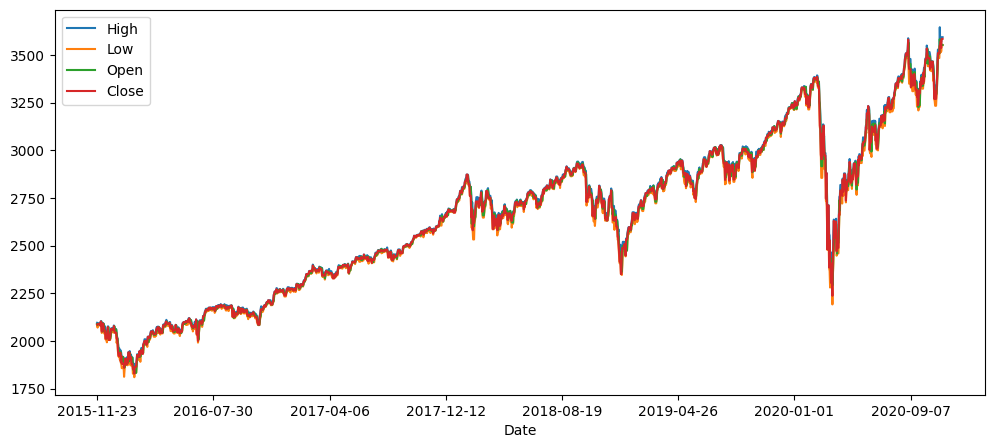

In [11]:
features_to_plot.plot(figsize=(12, 5))

In [12]:
features_to_plot

,High,Low,Open,Close
Date,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107
...,...,...,...,...
2020-11-11,3581.159912,3557.000000,3563.219971,3572.659912
2020-11-12,3569.020020,3518.580078,3562.669922,3537.010010
2020-11-13,3593.659912,3552.570068,3552.570068,3585.149902


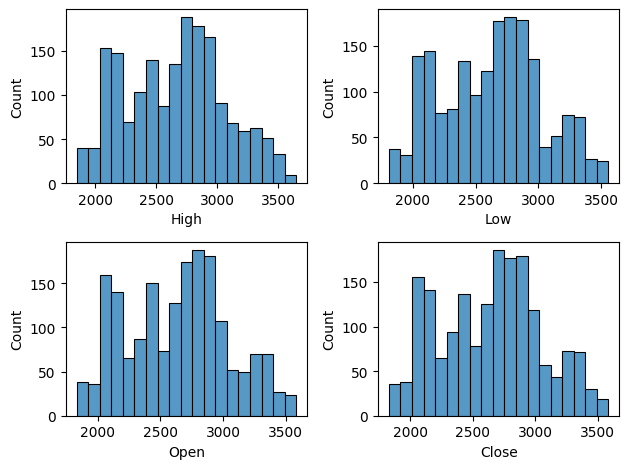

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2)
sns.histplot(data=yahoo_df['High'], kde=False, ax=ax[0,0])
sns.histplot(data=yahoo_df['Low'], kde=False, ax=ax[0,1])
sns.histplot(data=yahoo_df['Open'], kde=False, ax=ax[1,0])
sns.histplot(data=yahoo_df['Close'], kde=False, ax=ax[1,1])
plt.tight_layout()

From the above two plots, I deduced that;

1. High, Low, High, and Close follow the same pattern over a period of 1825 days.
2. The prices are non-stationary.

Due to this reason, I can choose to use one feature to use for predicting. In my case, I am going to choose "High".


4. DATA SPLITING

For this project, I am going to split data into train and test.


In [14]:
high_df = pd.DataFrame(yahoo_df['High'].copy(), columns=['High'])

In [15]:
high_df.head()

,High
Date,
2015-11-23,2095.610107
2015-11-24,2094.120117
2015-11-25,2093.000000
2015-11-26,2093.000000
2015-11-27,2093.290039


In [16]:
training_size = int(len(high_df) * .7)

In [17]:
training_data = high_df.iloc[0:training_size]
testing_data = high_df.iloc[training_size:len(high_df)]

In [18]:
training_data[:5], testing_data[:5]

(                   High
 Date                   
 2015-11-23  2095.610107
 2015-11-24  2094.120117
 2015-11-25  2093.000000
 2015-11-26  2093.000000
 2015-11-27  2093.290039,
                    High
 Date                   
 2019-05-20  2853.860107
 2019-05-21  2868.879883
 2019-05-22  2865.469971
 2019-05-23  2836.699951
 2019-05-24  2841.360107)

In [19]:
# Create dataset
def dataset(X, y, window=1):
    """
    Parameters
    ----------
    X - X data values
    y - y data values/target
    ------
    Return
    ------
    Numpy array for x and y
    """
    _x,_y = [], []
    
    for i in range(len(X) - window):
        vals = X.iloc[i: i+window].values # Temporary values
        _x.append(vals)
        _y.append(y.iloc[i+window])
    
    return np.array(_x), np.array(_y)

In [20]:
Xy_train = training_data['High']
Xy_test = testing_data['High']
Xtrain, ytrain = dataset(training_data, Xy_train,10)
Xtest, ytest = dataset(testing_data, Xy_test,10)

In [21]:
Xtrain.shape

(1264, 10, 1)

In [22]:
ytrain.shape

(1264,)

In [23]:
Xtest.shape

(536, 10, 1)

## MODELING

## BASELINE (RANDOM FOREST)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [25]:
# Reshape to 2d
Xtrain2d = Xtrain.reshape((Xtrain.shape[0], Xtrain.shape[1]))

Xtest2d = Xtest.reshape((Xtest.shape[0], Xtest.shape[1]))

In [26]:
rfr_model = RandomForestRegressor(n_estimators = 50, random_state = 0)
rfr_model.fit(Xtrain2d, ytrain)

RandomForestRegressor(n_estimators=50, random_state=0)

In [27]:
rfr_preds = rfr_model.predict(Xtest2d)

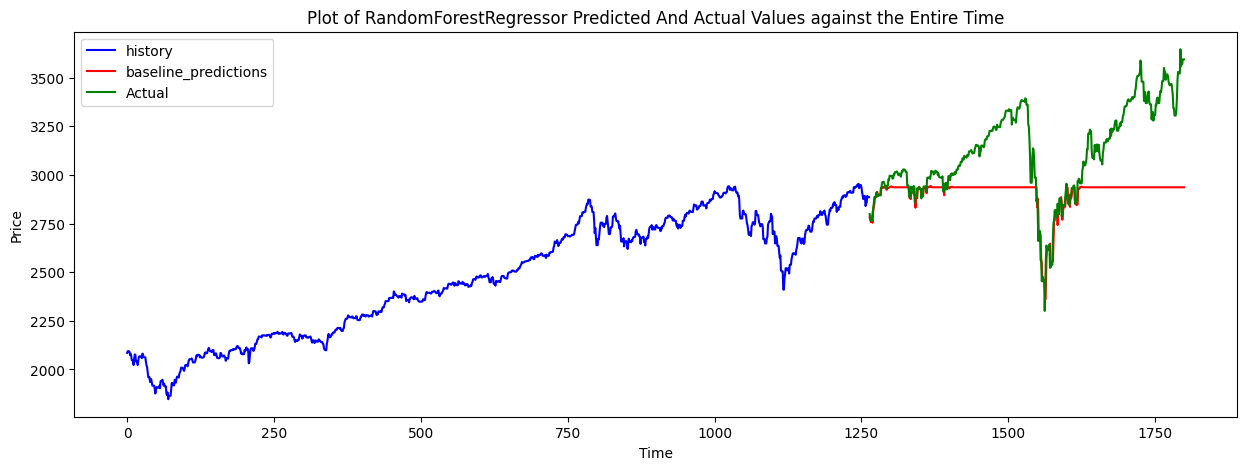

In [28]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, len(Xtrain)), ytrain, 'b', label="history")
plt.plot(np.arange(len(Xtrain2d), len(Xtrain2d) + len(Xtest2d)), rfr_preds, 'r', label="baseline_predictions")
plt.plot(np.arange(len(Xtrain), len(Xtrain) + len(Xtest)), ytest, 'g', label="Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Plot of RandomForestRegressor Predicted And Actual Values against the Entire Time")
plt.legend()

## 5. LINEAR REGRESSION


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr_model = LinearRegression()
lr_model.fit(Xtrain2d, ytrain)

LinearRegression()

In [31]:
# Predictions 
y_train_preds = lr_model.predict(Xtrain2d)
y_test_preds = lr_model.predict(Xtest2d)

In [32]:
lr_r2_score = r2_score(ytest, y_test_preds)

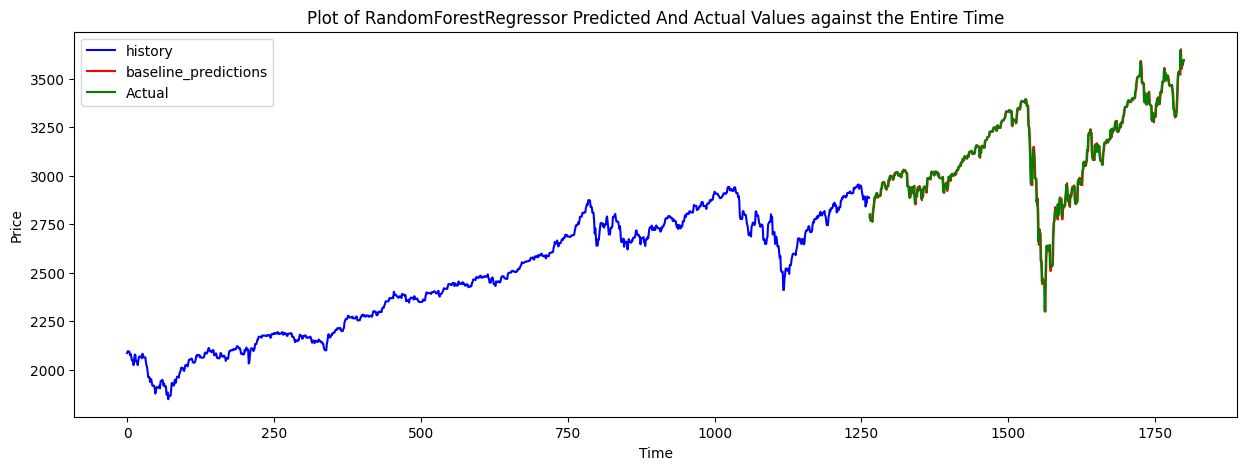

In [33]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, len(Xtrain)), ytrain, 'b', label="history")
plt.plot(np.arange(len(Xtrain2d), len(Xtrain2d) + len(Xtest2d)), y_test_preds, 'r', label="baseline_predictions")
plt.plot(np.arange(len(Xtrain), len(Xtrain) + len(Xtest)), ytest, 'g', label="Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Plot of RandomForestRegressor Predicted And Actual Values against the Entire Time")
plt.legend()

## Simple Neural Network

I am going to build a simple neural network with 50 hidden layers.

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten

2023-02-27 18:01:22.686743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 18:01:22.857022: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-27 18:01:22.857065: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-27 18:01:23.788345: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [35]:
# Hypertext
INPUT_SHAPE = (Xtrain.shape[1], Xtrain.shape[2])
NEURONS = 64
EPOCHS = 25
BATCH_SIZE = 16

In [36]:
SimpleNN = Sequential()
SimpleNN.add(Flatten(input_shape=INPUT_SHAPE))
SimpleNN.add(Dense(NEURONS, activation='relu')) 
SimpleNN.add(Dense(1)) 

SimpleNN.compile(optimizer="adam",loss='mean_squared_error',metrics=['accuracy'])

SimpleNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


2023-02-27 18:01:24.741267: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-27 18:01:24.741332: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-27 18:01:24.741367: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (charles): /proc/driver/nvidia/version does not exist
2023-02-27 18:01:24.741766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
history = SimpleNN.fit(Xtrain,ytrain,epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=0)

In [38]:
snn_preds = SimpleNN.predict(Xtest).reshape(ytest.shape)

17/17 [==============================] - 0s 1ms/step


In [39]:
snn_r2_score = r2_score(ytest, snn_preds)

In [40]:
print(history.history['accuracy'][-1])

0.0


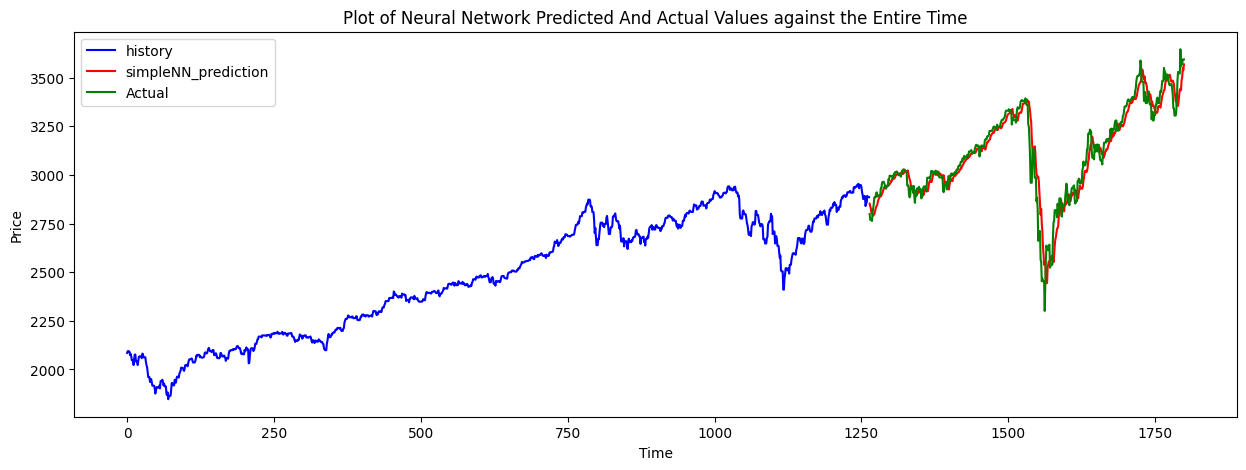

In [41]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, len(Xtrain)), ytrain, 'b', label="history")
plt.plot(np.arange(len(Xtrain), len(Xtrain) + len(Xtest)), snn_preds, 'r', label="simpleNN_prediction")
plt.plot(np.arange(len(Xtrain), len(Xtrain) + len(Xtest)), ytest, 'g', label="Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Plot of Neural Network Predicted And Actual Values against the Entire Time")
plt.legend()

## LSTM MODEL

In [42]:
# Hyperparameters

UNITS = 50

In [43]:
model = Sequential()

model.add(LSTM(NEURONS, activation='relu', return_sequences=True, input_shape=INPUT_SHAPE))
model.add(LSTM(NEURONS, activation='relu', return_sequences=False))
model.add(Dense(NEURONS/2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')


In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52,033
Trainable params: 52,033
Non-trainable params: 0
_________________________________________________________________


In [45]:

history = model.fit(Xtrain, ytrain, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/25
79/79 [==============================] - 3s 9ms/step - loss: 1163638.5000
Epoch 2/25
79/79 [==============================] - 1s 9ms/step - loss: 1205.1094
Epoch 3/25
79/79 [==============================] - 1s 8ms/step - loss: 1172.5863
Epoch 4/25
79/79 [==============================] - 1s 8ms/step - loss: 1153.1300
Epoch 5/25
79/79 [==============================] - 1s 10ms/step - loss: 1187.6691
Epoch 6/25
79/79 [==============================] - 1s 9ms/step - loss: 1163.9672
Epoch 7/25
79/79 [==============================] - 1s 8ms/step - loss: 1170.7344
Epoch 8/25
79/79 [==============================] - 1s 9ms/step - loss: 791.4450
Epoch 9/25
79/79 [==============================] - 1s 8ms/step - loss: 742.7529
Epoch 10/25
79/79 [==============================] - 1s 8ms/step - loss: 703.4667
Epoch 11/25
79/79 [==============================] - 1s 8ms/step - loss: 729.7166
Epoch 12/25
79/79 [==============================] - 1s 9ms/step - loss: 742.7644
Epoch 13/25
79

In [46]:
y_preds = model.predict(Xtest)

17/17 [==============================] - 0s 6ms/step


In [47]:
lstm_r2_score = r2_score(ytest, y_preds)

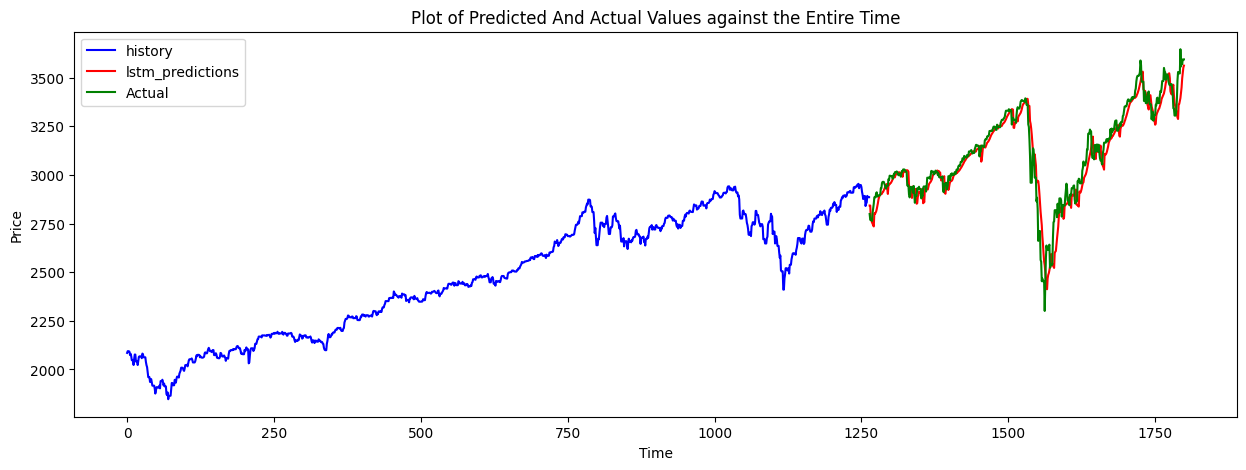

In [48]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, len(Xtrain)), ytrain, 'b', label="history")
plt.plot(np.arange(len(Xtrain), len(Xtrain) + len(Xtest)), y_preds, 'r', label="lstm_predictions")
plt.plot(np.arange(len(Xtrain), len(Xtrain) + len(Xtest)), ytest, 'g', label="Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Plot of Predicted And Actual Values against the Entire Time")
plt.legend()

# R2_SCORE

I chose to use r2_score since the output is continous data.

In [49]:
print(f"Linear Regression: {round(lr_r2_score * 100, 2)}%")
print(f"Simple Neural Network: {round(snn_r2_score * 100, 2)}%")
print(f"LSTM: {round(lstm_r2_score * 100, 2)}%")

Linear Regression: 98.15%
Simple Neural Network: 91.61%
LSTM: 90.76%


**Observations**

From above, when we look at the four predictions on plots, we deduce that; RandomForestRegressor (Baseline Model) performs very poor, while other three models (Linear Regression, Simple Neural Network, and LSTM) seem to fit perfectly. After running r2_score, Linear Regression performs better than the other two models. Therefore, I recommend implimentation of Linear Regression model to predict future prices.

## TRADING STRATEGY.

In this section, I am going to design a simple strategy for determining when to buy/sell. I am going to use Stochastic Oscillator and Moving Average Convergence/Divergence (MACD) indicators to determine when to buy and sell.

<li>Stochastic Oscillator</li>

This indicator is moomentum-based used for identifying the state of both overbought or oversold. In stock, we refer to market as overbought when market's trend are extremely bullish and bound to consolidate. The stocks are refered to oversold when trends have a tendancy to bounce. In order to identify overbought and oversold, sochastic oscillator uses %K Line and %D Line.

%K Line is represented as follows for a period of 14 days

%K = ((14-day CP - 14-day LP) - (14-day HP - 14-day LP))

**NOTE:** *CP - Closing Price, LP - Lowest Price, HP - Highest Price*

%D Line is moving average of %K line over a specifid preiod of time.

<li>MACD</li>

MACD = EMA (Exponential Moving Average) with longer periods - EMA with shorter periods.

MACD has 3 components; MACD Line, Signal Line, and Histogram.

**Signal Line** - This is the EMA of MACD Line for a specified period. MACD Line formular is the same as MACD.

**Histogram** - This is plotted to show the difference between MACD Line and Signal Line.


Now that I halve theoretical undestanding of Stochastic indicator and MACD, let me design my Trading Strategy. Stock is all about buying and selling. Therefore, one should buy when %K and %D are low, and the MACD Line and Signal line are low. In my case, I will buy stock when %K and %D is below 25, MACD Line and Signal Line below -2. Will sell when %K and %D is above 70, and MACD Line and Signal Line is more than 2.

**BUY**

When: ((%K & %D) < 25) & ((MACD LINE & SIGNAL LINE) < -2)

**SELL**

When: ((%K & %D) > 75) & ((MACD LINE & SIGNAL LINE) > 2)

These are steps to follow when implimenting the strategy:
<li>Create Dataframe of predicted values</li>
<li>Calculate Stockstic Osclillator</li>
<li>Calculate MACD</li>
<li>Create Trading Strategy</li>
<li></li>

# CREATE DATAFRAME

In [50]:
# Pull yahoo df
yahoo_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3587980000,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3884930000,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2852940000,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2852940000,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1466840000,2090.110107


# Stockstic Oscillator Calculation

In [51]:
def calculate_stochtick(high, low, close, preriod=14, dl=3):
    l_low = low.rolling(preriod).min()
    h_high = high.rolling(preriod).max()
    k_line = 100 * ((close - l_low) / (h_high - l_low))
    d_line = k_line.rolling(dl).mean()
    return k_line, d_line

yahoo_df['%k'], yahoo_df['%d'] = calculate_stochtick(yahoo_df['High'], yahoo_df['Low'], yahoo_df['Close'])
yahoo_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,%k,%d
Date,,,,,,,,
2020-11-06,3521.580078,3484.340088,3508.340088,3509.439941,4833950000,3509.439941,93.354986,90.028326
2020-11-07,3521.580078,3484.340088,3508.340088,3509.439941,4833950000,3509.439941,93.354986,93.469069
2020-11-08,3521.580078,3484.340088,3508.340088,3509.439941,4833950000,3509.439941,93.354986,93.354986
2020-11-09,3645.989990,3547.479980,3583.040039,3550.500000,8556610000,3550.500000,76.825633,87.845202
2020-11-10,3557.219971,3511.909912,3543.260010,3545.530029,6024230000,3545.530029,75.619476,81.933365
2020-11-11,3581.159912,3557.000000,3563.219971,3572.659912,4609970000,3572.659912,82.203599,78.216236
2020-11-12,3569.020020,3518.580078,3562.669922,3537.010010,4890120000,3537.010010,73.551761,77.124946
2020-11-13,3593.659912,3552.570068,3552.570068,3585.149902,4709670000,3585.149902,85.234782,80.330048
2020-11-14,3593.659912,3552.570068,3552.570068,3585.149902,4709670000,3585.149902,85.234782,81.340442


In [52]:
def calulate_macd(df, slow, fast, smooth):
    macd = ta.trend.MACD(df['Close'], window_slow=slow, window_fast=fast, window_sign=smooth)
    df['MACD_Line'] = macd.macd()
    df['Signal_Line'] = macd.macd_signal()
    df['Histogram'] = macd.macd_diff()
    new_df = df.dropna()
    return new_df

In [53]:
yahoo_df = calulate_macd(yahoo_df, 26, 12, 9)

In [54]:
yahoo_df.head()

,High,Low,Open,Close,Volume,Adj Close,%k,%d,MACD_Line,Signal_Line,Histogram
Date,,,,,,,,,,,
2015-12-26,2067.360107,2058.729980,2063.520020,2060.989990,1411860000,2060.989990,81.152663,81.152663,-4.428167,-10.675039,6.246871
2015-12-27,2067.360107,2058.729980,2063.520020,2060.989990,1411860000,2060.989990,81.152663,81.152663,-2.900093,-9.120049,6.219956
2015-12-28,2057.770020,2044.199951,2057.770020,2056.500000,2492510000,2056.500000,71.676752,77.994026,-2.028011,-7.701642,5.673631
2015-12-29,2081.560059,2060.540039,2060.540039,2078.360107,2542000000,2078.360107,95.802247,82.877221,0.422182,-6.076877,6.499059
2015-12-30,2077.340088,2061.969971,2077.340088,2063.360107,2367430000,2063.360107,76.124981,81.201327,1.140457,-4.633410,5.773867


In [55]:
def stock_strategy(prices, kl, dl, macd, macd_signal):    
    bp = []
    sp = []
    sm_signal = []
    signal = 0

    for i in range(len(prices)):
        # ((%K & %D) < 25) & ((MACD LINE & SIGNAL LINE) < -2)
        if kl[i] < 25 and dl[i] < 25 and macd[i] < -2 and macd_signal[i] < -2:
            if signal != 1:
                bp.append(prices[i])
                sp.append(np.nan)
                signal = 1
                sm_signal.append(signal)
            else:
                bp.append(np.nan)
                sp.append(np.nan)
                sm_signal.append(0)
        # ((%K & %D) > 75) & ((MACD LINE & SIGNAL LINE) > 2)
        elif kl[i] > 75 and dl[i] > 75 and macd[i] > 2 and macd_signal[i] > 2:
            if signal != -1 and signal != 0:
                bp.append(np.nan)
                sp.append(prices[i])
                signal = -1
                sm_signal.append(signal)
            else:
                bp.append(np.nan)
                sp.append(np.nan)
                sm_signal.append(0)
        
        else:
            bp.append(np.nan)
            sp.append(np.nan)
            sm_signal.append(0)
            
    return bp, sp, sm_signal

# Predict

Here, I am going to impliment Linear Regression model.

In [56]:
predictions = lr_model.predict(Xtest2d)

In [57]:
len(ytest)

536

In [58]:
yahoo_df = yahoo_df[yahoo_df['High'].isin(ytest.tolist())]

In [59]:
yahoo_df['High Predicted'] = predictions

In [60]:
yahoo_df.head()

,High,Low,Open,Close,Volume,Adj Close,%k,%d,MACD_Line,Signal_Line,Histogram,High Predicted
Date,,,,,,,,,,,,
2019-05-30,2799.000000,2776.739990,2786.939941,2788.860107,3273790000,2788.860107,19.092333,11.145720,-24.378031,-19.343782,-5.034249,2787.877708
2019-05-31,2768.979980,2750.520020,2766.149902,2752.060059,3981020000,2752.060059,1.141108,11.228045,-28.123209,-21.099668,-7.023541,2801.089665
2019-06-01,2768.979980,2750.520020,2766.149902,2752.060059,3981020000,2752.060059,1.141108,7.124850,-30.736972,-23.027129,-7.709844,2766.135608
2019-06-02,2768.979980,2750.520020,2766.149902,2752.060059,3981020000,2752.060059,1.301150,1.194455,-32.434514,-24.908606,-7.525908,2766.187889
2019-06-03,2763.070068,2728.810059,2751.530029,2744.449951,3943810000,2744.449951,11.165783,4.536014,-34.001947,-26.727274,-7.274673,2770.450534
